In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from scipy.stats import norm
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [107]:
df_train = pd.read_csv('train.csv', skipinitialspace=True)

df_test = pd.read_csv('test.csv', skipinitialspace=True)

In [106]:
df_train

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


## Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [73]:
x_train = df_train['loudness'].values.reshape(-1, 1)
y_train = df_train['energy'].values

x_test = df_test['loudness'].values.reshape(-1, 1)
y_test = df_test['energy'].values

In [74]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [75]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.03173381]
Intercept: 
 0.9385036181825721


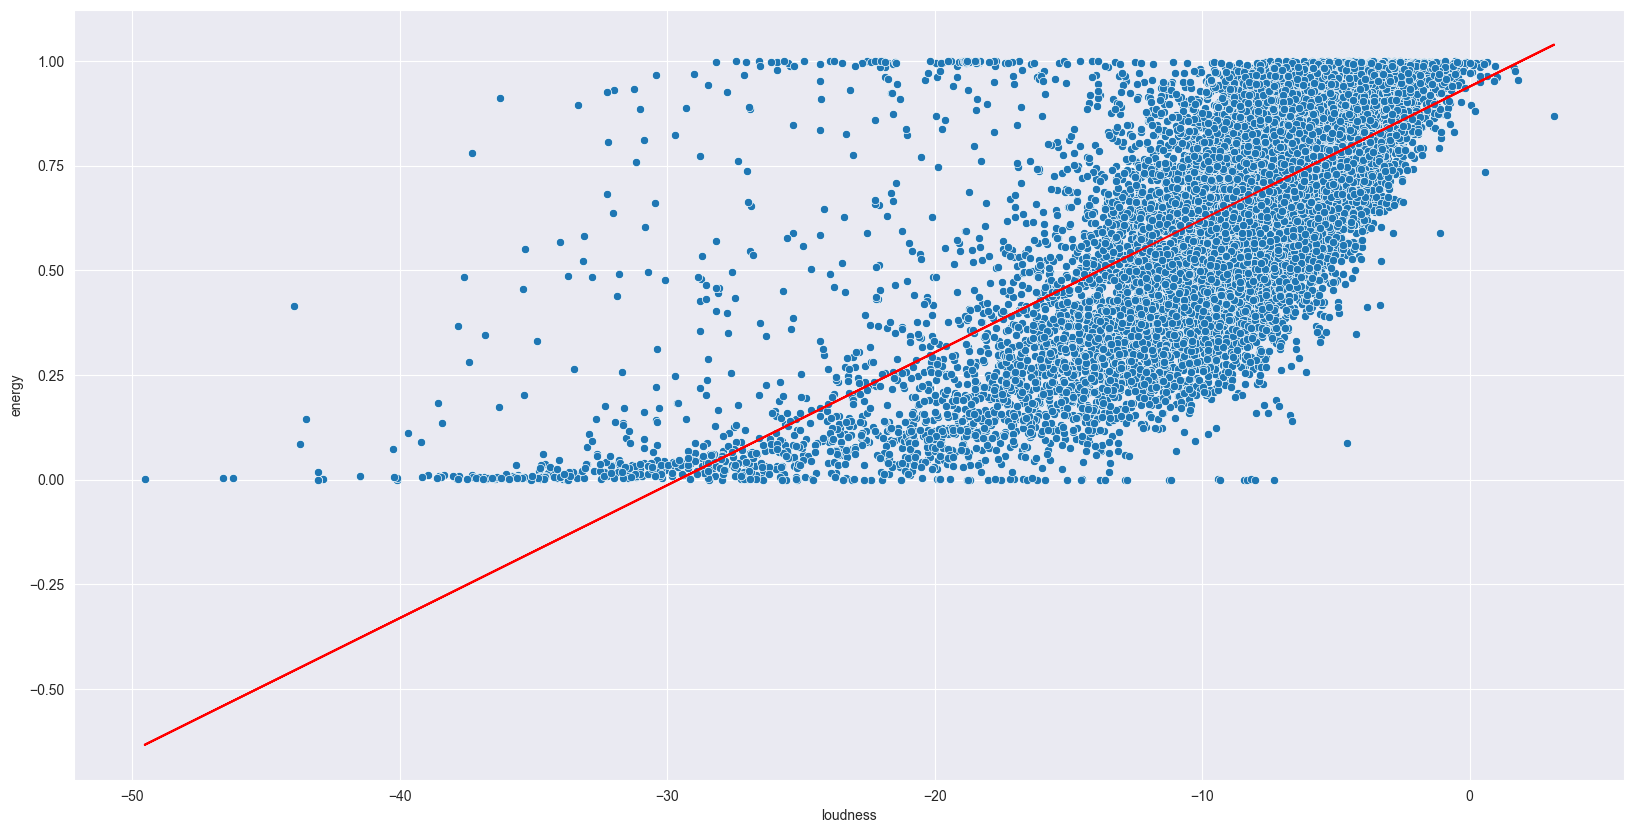

In [77]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_train, x='loudness', y='energy')
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, color='red')

In [79]:
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Coefficient of determination R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.03
Mean absolute error: 0.15
Coefficient of determination R2: 0.52


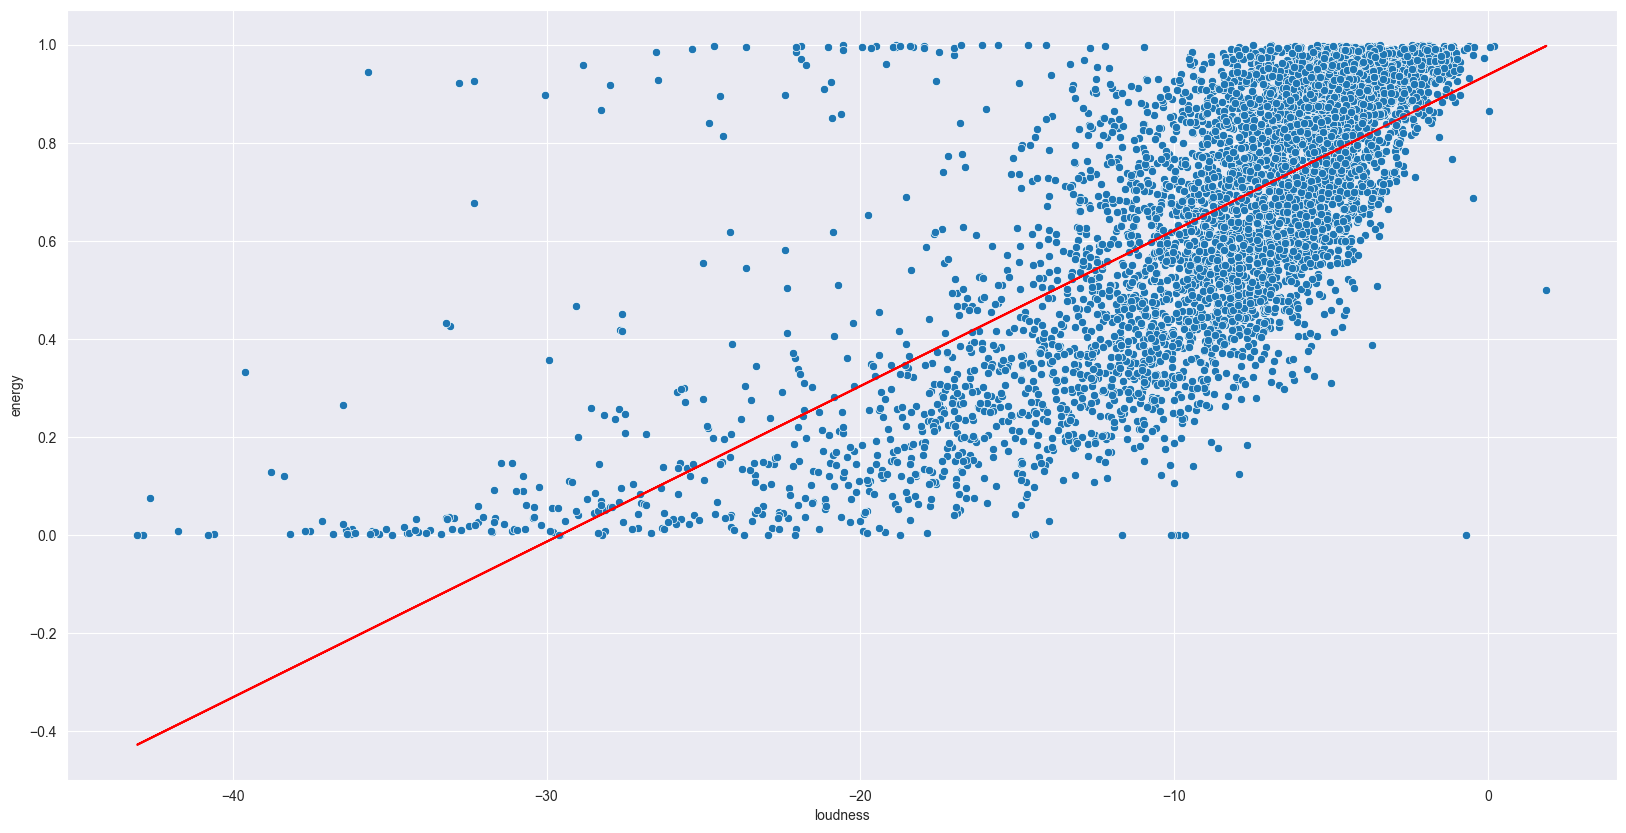

In [80]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_test, x='loudness', y='energy')
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, color='red')

## Ridge Regression

In [81]:
reg = Ridge()
reg.fit(x_train, y_train)

Ridge()

In [82]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.03173376]
Intercept: 
 0.9385030964313144


In [83]:
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Coefficient of determination R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.03
Mean absolute error: 0.15
Coefficient of determination R2: 0.52


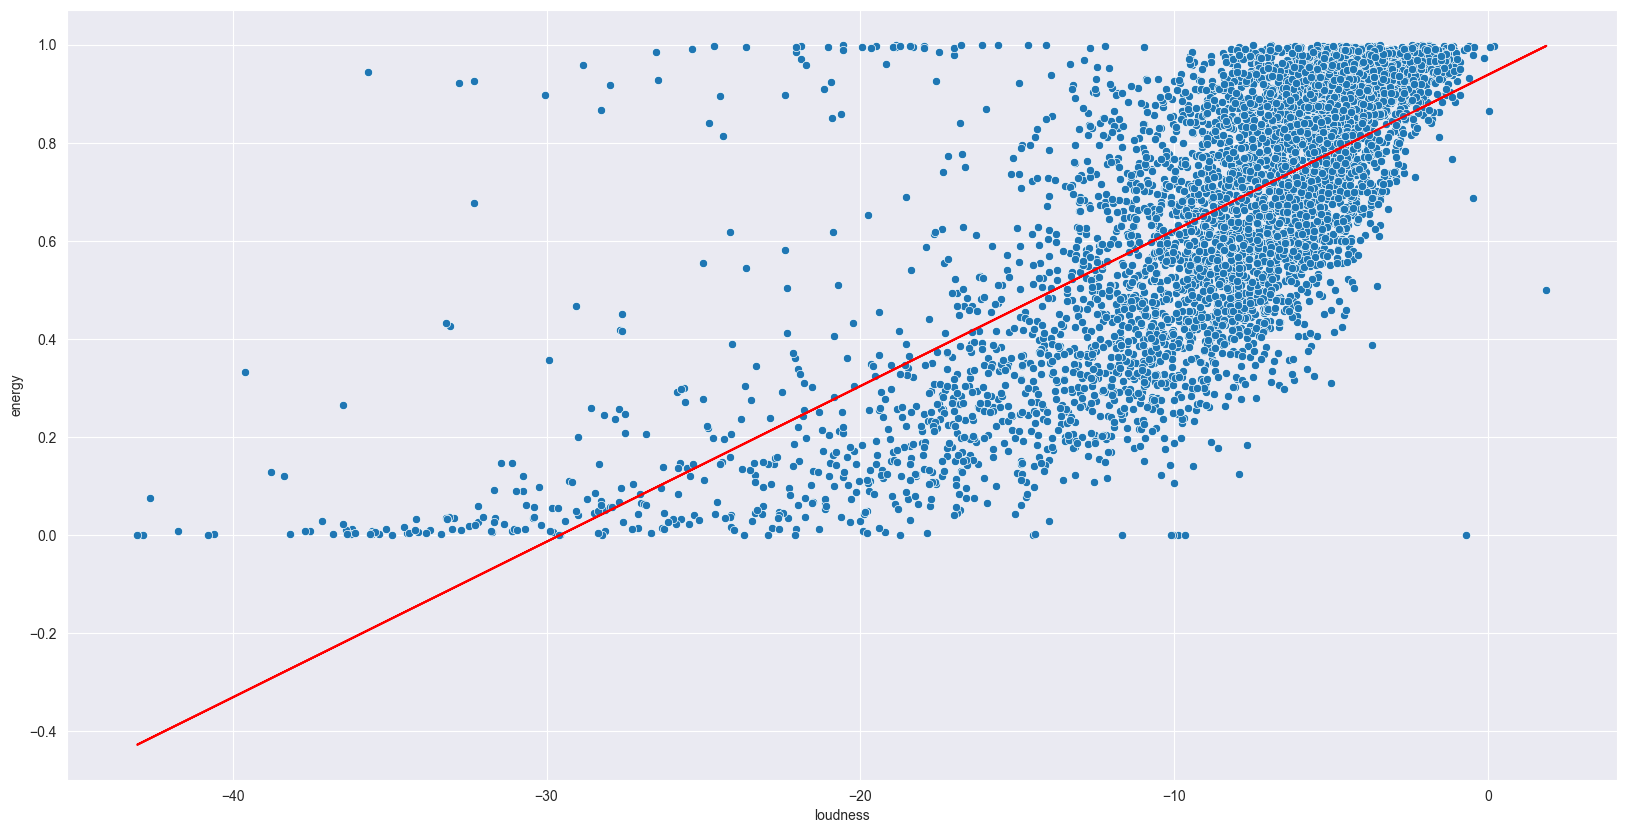

In [84]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_test, x='loudness', y='energy')
plt.plot(x_test, reg.coef_[0] * x_test + reg.intercept_, color='red')
## Ridge Regression

## Lasso Regression

In [86]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.00400781]
Intercept: 
 0.6918807846178181


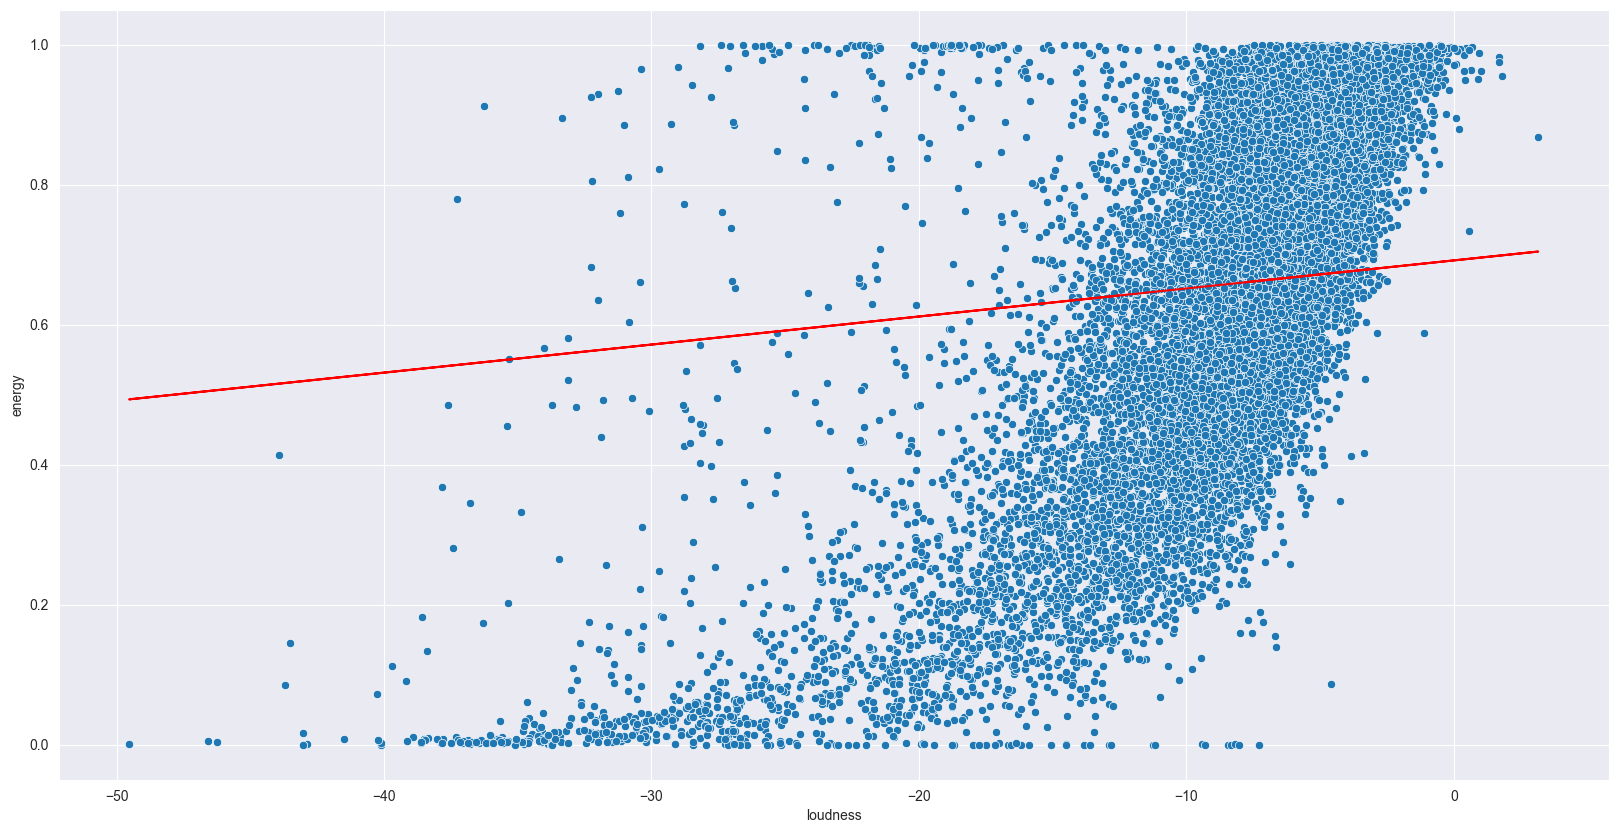

In [87]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_train, x='loudness', y='energy')
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, color='red')

In [88]:
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Coefficient of determination R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.06
Mean absolute error: 0.21
Coefficient of determination R2: 0.12


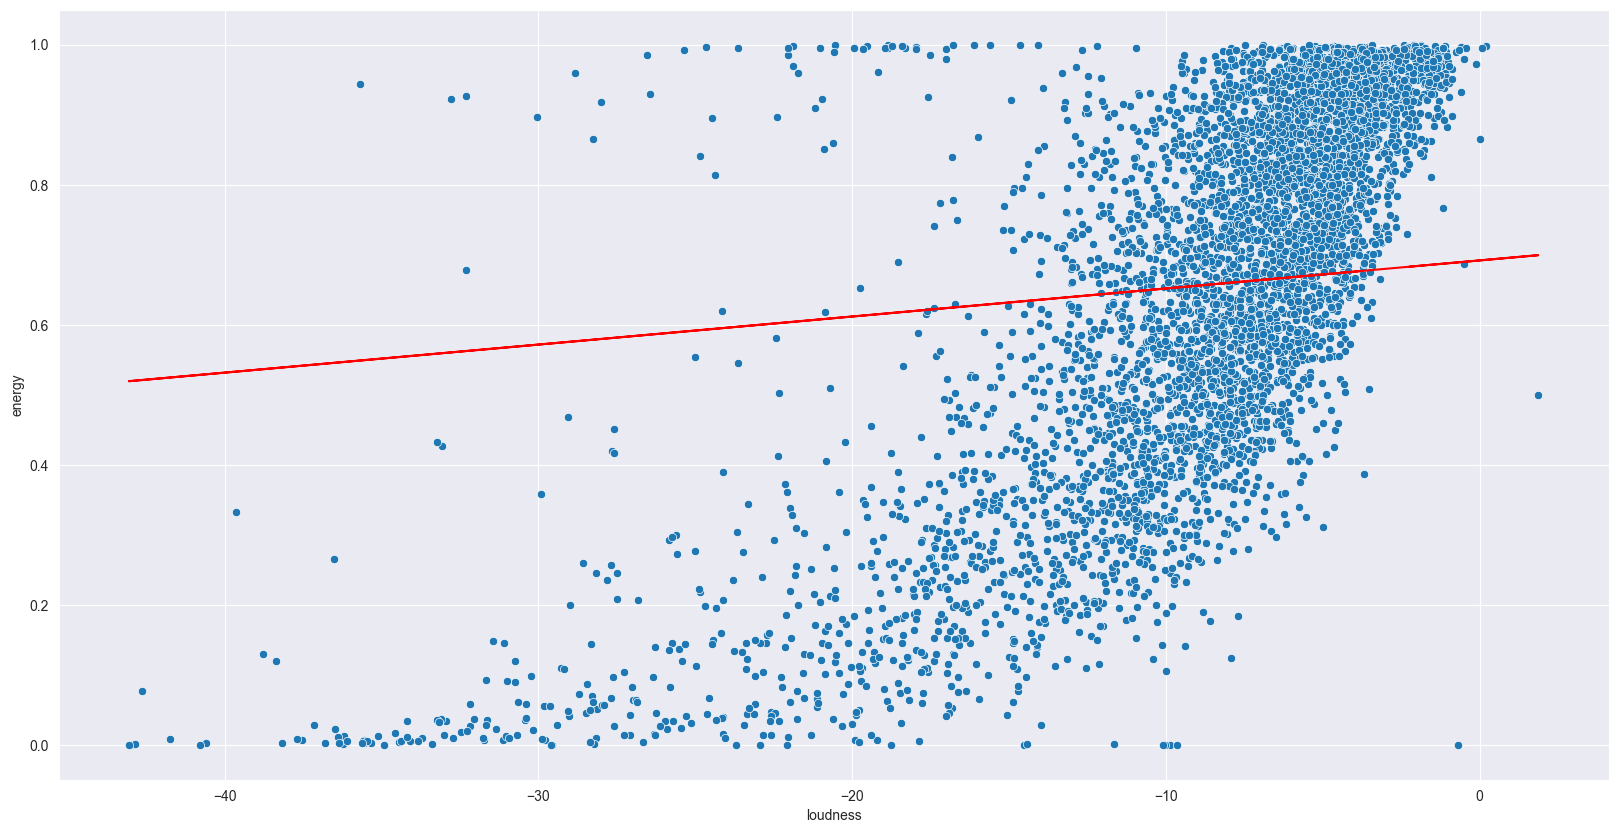

In [89]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_test, x='loudness', y='energy')
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, color='red')

## Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [155]:
reg = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=101)

In [156]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=101)

In [154]:
# i want to optimize parameters to get the best model
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 4, 5, 60, 7, 8, 9, 100],
              'min_samples_split': [2, 3, 4, 5, 60, 7, 8, 9, 100],
              'min_samples_leaf': [2, 3, 4, 5, 60, 7, 8, 9, 101]}

grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best score: -0.13271103463540454
Best parameters: {'max_depth': 5, 'min_samples_leaf': 101, 'min_samples_split': 2}


In [157]:
y_pred = reg.predict(x_test)

#MSE and MAE for tree regressor




print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Coefficient of determination R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.03
Mean absolute error: 0.13
Coefficient of determination R2: 0.57


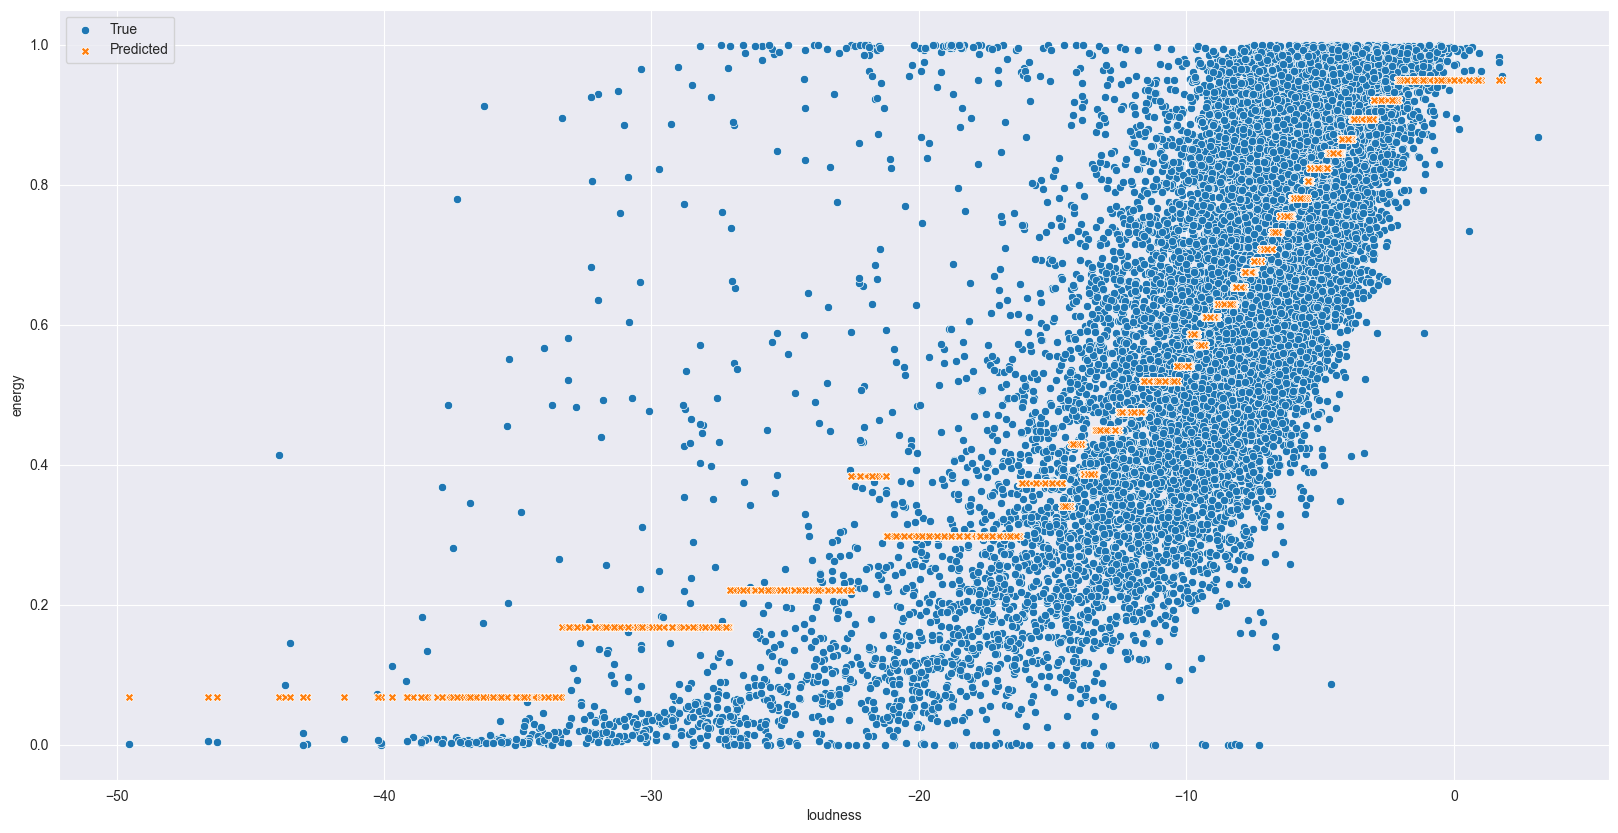

In [158]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_train, x='loudness', y='energy', label='True')
sns.scatterplot(data=df_train, x='loudness', y=reg.predict(x_train), label='Predicted', marker='X')
plt.legend()
plt.show()

## KNN Regressor

In [94]:
genres = df_train['genre'].unique()
# creo un dizionario per tenerli associati ad un numero
genres_dict = dict(zip(genres, range(len(genres))))
# Mappo i generi con i numeri
df_train['genre'] = df_train['genre'].map(genres_dict)
df_test['genre'] = df_test['genre'].map(genres_dict)

df_train['explicit'] = df_train['explicit'].astype(int)
df_test['explicit'] = df_test['explicit'].astype(int)

#Calculating only for the missing values in time_signature column by dividing n_beats/n_bars and rounding the result
df_train.loc[df_train['time_signature'].isna(), 'time_signature'] = round(df_train['n_beats'] / df_train['n_bars'])

df_test.loc[df_test['time_signature'].isna(), 'time_signature'] = round(df_test['n_beats'] / df_test['n_bars'])

from sklearn.preprocessing import MinMaxScaler

numerical_cols_train = df_train.select_dtypes(include=[np.number]).columns
numerical_cols_test = df_test.select_dtypes(include=[np.number]).columns


scaler = MinMaxScaler()

scaler.fit(df_train[numerical_cols_train])

scaled_numerical_train = scaler.transform(df_train[numerical_cols_train])
scaled_numerical_test = scaler.transform(df_test[numerical_cols_test])

df_train[numerical_cols_train] = scaled_numerical_train
df_test[numerical_cols_test] = scaled_numerical_test

#Dropping popularity confidence column
df_train.drop(columns=['popularity_confidence'], axis=1, inplace=True)
df_test.drop(columns=['popularity_confidence'], axis=1, inplace=True)

# Load your dataset
df_copy = df_train.copy()
df_copy_test = df_test.copy()

# Drop unnecessary columns
columns_to_drop = ['name', 'artists', 'album_name']
df_copy.drop(columns=columns_to_drop, axis=1, inplace=True)
df_copy_test.drop(columns=columns_to_drop, axis=1, inplace=True)


# Divide the dataset: one with known mode and one with missing mode
data_with_mode = df_copy.dropna(subset=['mode'])
data_missing_mode = df_copy[df_copy['mode'].isna()]
data_missing_mode_test = df_copy_test[df_copy_test['mode'].isna()]

# Features and target variable for the known 'mode'
X_known = data_with_mode.drop(columns=['mode'])
y_known = data_with_mode['mode']

# Features for the rows with missing 'mode'
X_missing = data_missing_mode.drop(columns=['mode'])
X_missing_test = data_missing_mode_test.drop(columns=['mode'])

# Train a classifier (e.g., Random Forest) on data with known 'mode'
clf = RandomForestClassifier(n_estimators=500, random_state=42, max_features=20)
clf.fit(X_known, y_known)

# Separate known and unknown 'mode' in test set
test_known_mode = df_copy_test.dropna(subset=['mode'])
test_unknown_mode = df_copy_test[df_copy_test['mode'].isna()]

# Features and actual 'mode' values for known 'mode' part of test set
X_test_known = test_known_mode.drop(columns=['mode'])
y_test_actual = test_known_mode['mode']

# Predict 'mode' for the known part of the test set
y_test_pred = clf.predict(X_test_known)

# Calculate accuracy
accuracy = accuracy_score(y_test_actual, y_test_pred)
print("Accuracy on test set:", accuracy)

# Predict 'mode' for rows with missing 'mode' in training and test set
y_missing_pred = clf.predict(X_missing)
y_missing_pred_test = clf.predict(X_missing_test)

# Fill in the missing 'mode' values with predictions in training and test sets
df_train.loc[df_train['mode'].isna(), 'mode'] = y_missing_pred
df_test.loc[df_test['mode'].isna(), 'mode'] = y_missing_pred_test


Accuracy on test set: 0.717434303475558


In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
x_train = df_train['loudness'].values.reshape(-1, 1)
y_train = df_train['energy'].values

x_test = df_test['loudness'].values.reshape(-1, 1)
y_test = df_test['energy'].values

In [102]:
reg = KNeighborsRegressor()

In [103]:
reg.fit(x_train, y_train)

KNeighborsRegressor()

In [104]:
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Coefficient of determination R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.04
Mean absolute error: 0.14
Coefficient of determination R2: 0.48


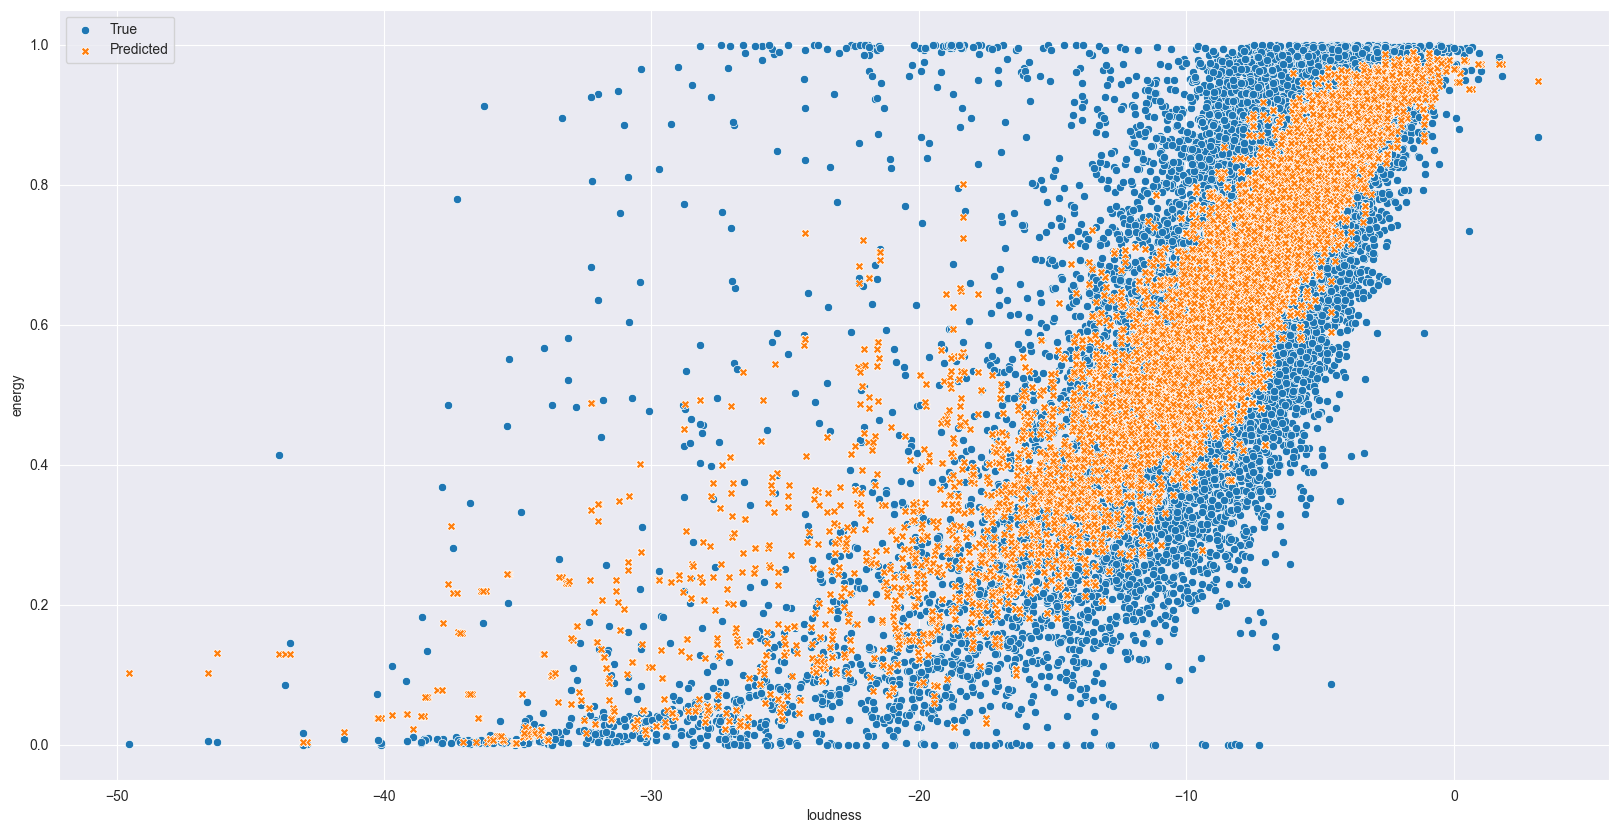

In [105]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_train, x='loudness', y='energy', label='True')
sns.scatterplot(data=df_train, x='loudness', y=reg.predict(x_train), label='Predicted', marker='X')
plt.legend()
plt.show()